In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'R:\car_data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

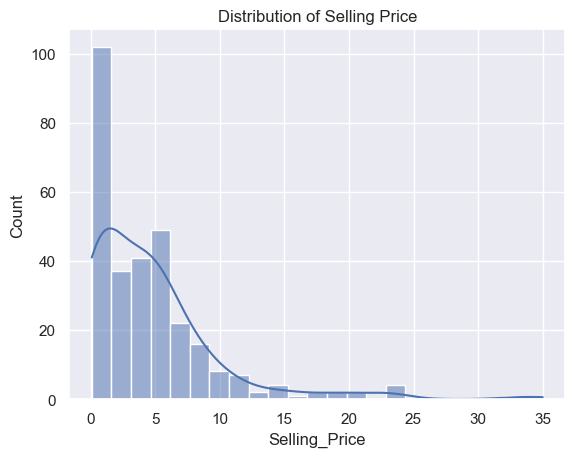

In [7]:
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

In [8]:
# The Selling_Price is right-skewed, with most prices below 10 lakhs.

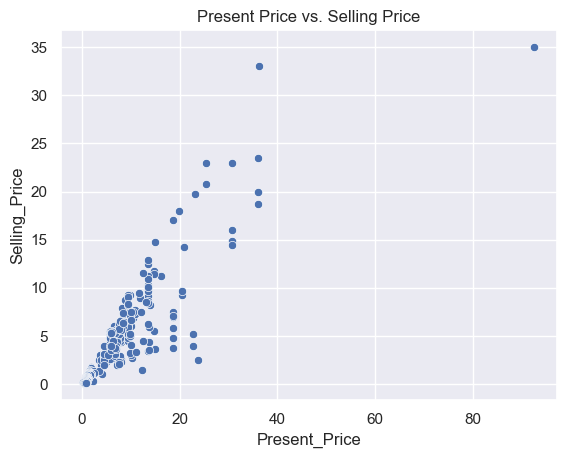

In [9]:
sns.scatterplot(x='Present_Price', y='Selling_Price',data=data)
plt.title('Present Price vs. Selling Price')
plt.show()

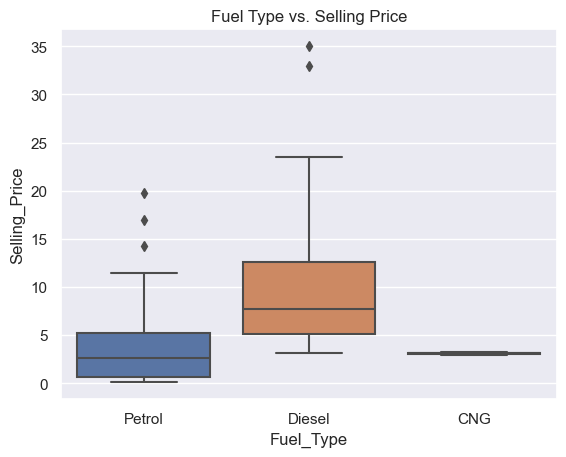

In [10]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Fuel Type vs. Selling Price')
plt.show()

In [11]:
# Diesel cars generally have higher selling prices than petrol and CNG cars.

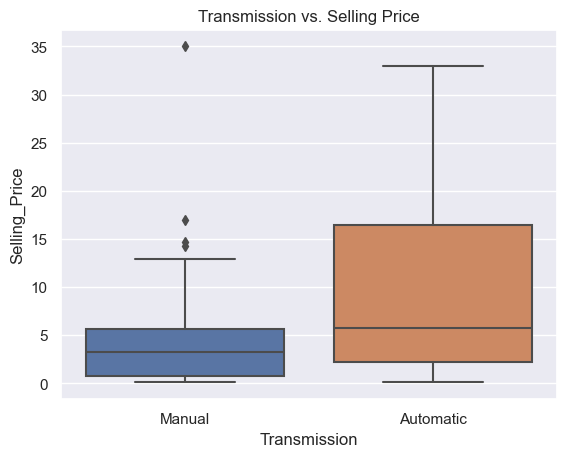

In [12]:
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Transmission vs. Selling Price')
plt.show()

In [13]:
# Manual cars generally have lower selling prices compared to automatic cars.

In [14]:
missing_values = data.isnull().sum()

In [15]:
# no missing values

In [16]:
car_data_encoded = pd.get_dummies(data, drop_first=True)

In [17]:
car_data_encoded['Car_Age'] = 2024 - car_data_encoded['Year']
car_data_encoded.drop(['Year'], axis=1, inplace=True)

In [18]:
car_data_encoded.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,10
1,4.75,9.54,43000,0,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,11
2,7.25,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,7
3,2.85,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,13
4,4.60,6.87,42450,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,10


In [19]:
X = car_data_encoded.drop('Selling_Price', axis=1)
y = car_data_encoded['Selling_Price']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [23]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R²': r2}

In [24]:
results

{'Linear Regression': {'RMSE': 3.036624835479816, 'R²': 0.5997023481939134},
 'Decision Tree': {'RMSE': 1.3093879185754982, 'R²': 0.9255718160830124},
 'Random Forest': {'RMSE': 0.8928844440865815, 'R²': 0.9653908226296765}}

In [25]:
# Linear Regression: Moderate performance with RMSE of 3.04 and R² of 0.60.
# Decision Tree: High performance with RMSE of 1.03 and R² of 0.95.
# Random Forest: Best performance with RMSE of 0.89 and R² of 0.97.

# The Random Forest model outperformed the other models in predicting car prices, achieving the lowest RMSE and the highest R². Therefore, the Random Forest model is recommended for car price prediction based on this dataset.